In [9]:
%pip install pyarrow pandas

   ---------------------------------------- 0.0/25.7 MB ? eta -:--:--
   ------------ --------------------------- 7.9/25.7 MB 37.4 MB/s eta 0:00:01
   -------------------------------- ------- 21.0/25.7 MB 49.1 MB/s eta 0:00:01
   ---------------------------------------  25.4/25.7 MB 46.0 MB/s eta 0:00:01
   ---------------------------------------- 25.7/25.7 MB 36.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install lightgbm


  Using cached lightgbm-4.6.0-py3-none-win_amd64.whl.metadata (17 kB)
Using cached lightgbm-4.6.0-py3-none-win_amd64.whl (1.5 MB)


In [ ]:
%pip install xgboost

In [ ]:
%pip install catboost

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import root_mean_squared_error
import lightgbm as lgb
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

Current working directory: c:\Users\felic\Downloads\MicronDataChallenge


In [3]:
# List all Parquet files in a directory
file_list = glob.glob("./train/metrology_data*.parquet")

# Read and concatenate all Parquet files
meas_df = pd.concat([pd.read_parquet(file) for file in file_list])

# Save to a new Parquet file
meas_df.to_parquet("meas_combined.parquet", index=False)

In [4]:
# List all Parquet files in a directory
file_list = glob.glob("./train/run_data_*.parquet")

# Read and concatenate all Parquet files
run_df = pd.concat([pd.read_parquet(file) for file in file_list])

# Save to a new Parquet file
run_df.to_parquet("run_combined.parquet", index=False)

In [5]:
# List all Parquet files in a directory
file_list = glob.glob("./train/incoming_run_data_*.parquet")

# Read and concatenate all Parquet files
incom_df = pd.concat([pd.read_parquet(file) for file in file_list])

# Save to a new Parquet file
incom_df.to_parquet("incom_run_combined.parquet", index=False)

In [3]:
meas_df      = pd.read_parquet("meas_combined.parquet")

In [4]:
incom_run_df  = pd.read_parquet("incom_run_combined.parquet")

In [5]:
run_df       = pd.read_parquet("run_combined.parquet")

In [6]:
print(f"Runs: {run_df.shape}, Incoming Runs: {incom_run_df.shape}, Measurements: {meas_df.shape}")

Runs: (41220750, 10), Incoming Runs: (82896506, 9), Measurements: (202860, 9)


In [7]:
run_df.head()

,Tool ID,Run Start Time,Run End Time,Run ID,Process Step,Consumable Life,Step ID,Time Stamp,Sensor Name,Sensor Value
0,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_0,2024-01-01 00:00:00.000000000,Sensor_A,-0.061105
1,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_0,2024-01-01 00:00:01.000000002,Sensor_A,-0.040894
2,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_0,2024-01-01 00:00:01.999999997,Sensor_A,0.005357
3,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_1,2024-01-01 00:00:03.000000000,Sensor_A,-0.029941
4,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_1,2024-01-01 00:00:04.000000002,Sensor_A,-0.098098


In [8]:
print(run_df.columns.tolist())

['Tool ID', 'Run Start Time', 'Run End Time', 'Run ID', 'Process Step', 'Consumable Life', 'Step ID', 'Time Stamp', 'Sensor Name', 'Sensor Value']


In [9]:
incom_run_df.head()

,Tool ID,Run Start Time,Run End Time,Run ID,Process Step,Step ID,Time Stamp,Sensor Name,Sensor Value
0,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2023-12-31,2023-12-31 00:12:22,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,Step_0,2023-12-31 00:00:00.000000000,Sensor_1,202.660553
1,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2023-12-31,2023-12-31 00:12:22,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,Step_0,2023-12-31 00:00:01.000000002,Sensor_1,202.660553
2,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2023-12-31,2023-12-31 00:12:22,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,Step_0,2023-12-31 00:00:01.999999997,Sensor_1,202.660553
3,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2023-12-31,2023-12-31 00:12:22,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,Step_1,2023-12-31 00:00:03.000000000,Sensor_1,202.660553
4,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2023-12-31,2023-12-31 00:12:22,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,Step_1,2023-12-31 00:00:04.000000002,Sensor_1,202.660553


In [10]:
print(incom_run_df.columns.tolist())

['Tool ID', 'Run Start Time', 'Run End Time', 'Run ID', 'Process Step', 'Step ID', 'Time Stamp', 'Sensor Name', 'Sensor Value']


In [11]:
run_df['Time_utc'] = pd.to_datetime(run_df['Time Stamp'])
run_df.head()

,Tool ID,Run Start Time,Run End Time,Run ID,Process Step,Consumable Life,Step ID,Time Stamp,Sensor Name,Sensor Value,Time_utc
0,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_0,2024-01-01 00:00:00.000000000,Sensor_A,-0.061105,2024-01-01 00:00:00.000000000
1,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_0,2024-01-01 00:00:01.000000002,Sensor_A,-0.040894,2024-01-01 00:00:01.000000002
2,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_0,2024-01-01 00:00:01.999999997,Sensor_A,0.005357,2024-01-01 00:00:01.999999997
3,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_1,2024-01-01 00:00:03.000000000,Sensor_A,-0.029941,2024-01-01 00:00:03.000000000
4,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_1,2024-01-01 00:00:04.000000002,Sensor_A,-0.098098,2024-01-01 00:00:04.000000002


In [12]:
print(run_df['Run ID'].value_counts())
print(run_df['Tool ID'].value_counts())
print(run_df['Process Step'].value_counts())
print(run_df['Step ID'].value_counts())
print(run_df['Sensor Name'].value_counts())

Run ID
0b303820-4363-5f8d-8a8f-fb58dc4a7507    10995
3c2e0ee4-66ab-54b2-a15b-539f0dd53218    10995
eabb6187-9188-56cb-80e7-25f0ca76fa31    10995
1f05588f-cdd6-5929-80d9-b1a1ad820405    10995
a36db8ec-c57b-5a22-8c62-e7a1f8ac4e18    10995
                                        ...  
c737ec18-0d4b-55b2-be1a-f2e4669bae34     8835
7c3436e3-46bc-5b2b-a151-121c12579043     8835
c50605ad-39ed-51f2-8810-605a68ea8feb     8835
1da15509-9fa6-55ca-ad1a-18e3c23852d7     8835
a8d8bf3a-673c-581e-80d0-ba017b298020     8835
Name: count, Length: 4140, dtype: int64
Tool ID
5116a75f-0543-502f-8278-2b2496d337d2    2253105
1914935a-df63-54c2-9c47-da905244e631    2251365
bb7e0385-0227-575a-9894-dacc8bf07f2a    2249430
683e5405-4b93-5160-be90-d3d5b0d9287a    2248140
4738fd3d-8fc7-59fd-85a7-eec6efb4bfae    2246790
db66ded5-0f4f-5179-b8e7-4673304ddff1    2244840
e4838ac1-3788-50bf-bbca-04cf339ec369    2244480
b3439d8e-290b-59a4-96a5-53348288f6a9    2241630
08e35986-3a0a-5274-8990-4ad303be9d5f    2241630
8060e8e

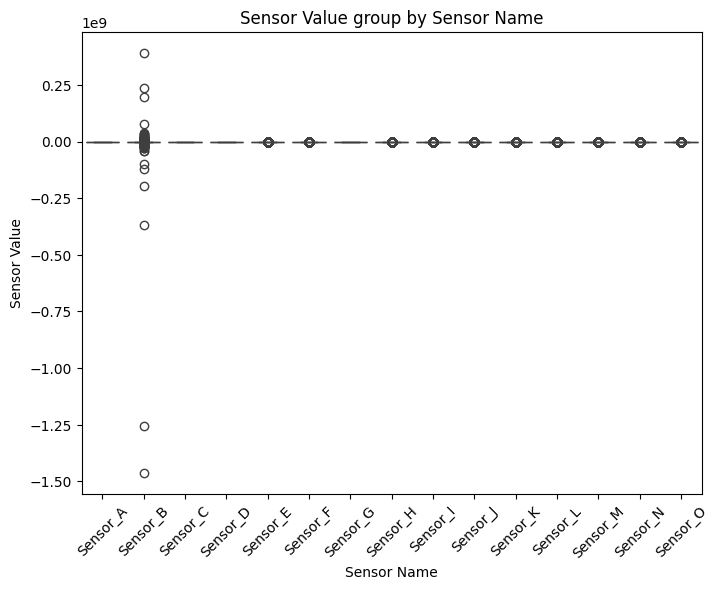

In [16]:
# Plot the graph
plt.figure(figsize=(8, 6))  # Adjust figure size
sns.boxplot(x='Sensor Name', y='Sensor Value', data=run_df)
plt.xticks(rotation=45)
plt.title(f'Sensor Value group by Sensor Name')

# Show the plot
plt.show()

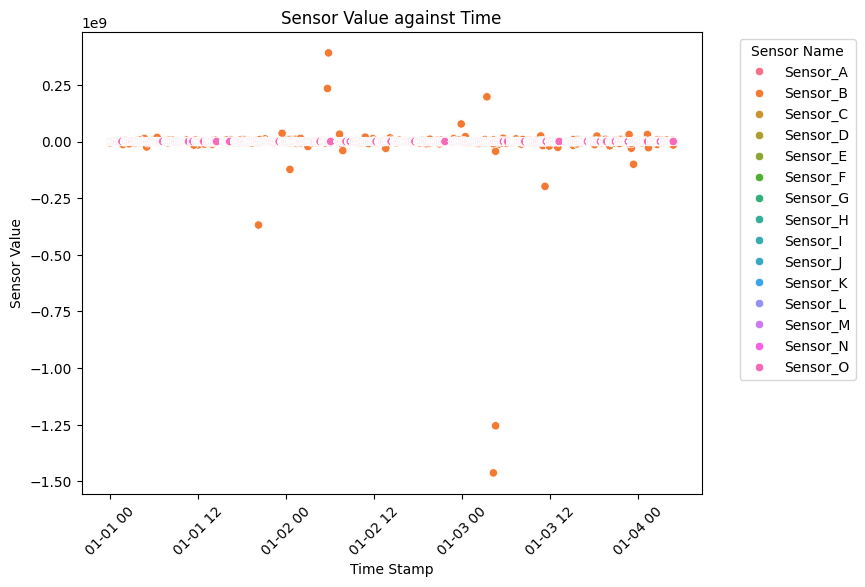

In [ ]:
# # Plot the graph with categorization
# plt.figure(figsize=(8, 6))  # Adjust figure size
# sns.scatterplot(x='Time Stamp', y='Sensor Value', hue='Sensor Name', data=run_df)

# plt.title(f'Sensor Value against Time')
# plt.legend(title="Sensor Name", bbox_to_anchor=(1.05, 1), loc='upper left')  # Ensure legend shows sensor categories
# plt.xticks(rotation=45)  # Rotate timestamps for readability

# # Show the plot
# plt.show()


In [18]:
meas_df.head()

,Run ID,Run Start Time,Run End Time,X_index,Y_index,X,Y,Point Index,Measurement
0,00862337-2cc0-5b34-b5e1-45588e935c39,2024-01-02 04:45:25,2024-01-02 04:58:00,1,23,-143.877551,-9.183673,3,10.006534
1,00862337-2cc0-5b34-b5e1-45588e935c39,2024-01-02 04:45:25,2024-01-02 04:58:00,1,29,-143.877551,27.551020,48,10.002181
2,00862337-2cc0-5b34-b5e1-45588e935c39,2024-01-02 04:45:25,2024-01-02 04:58:00,2,34,-137.755102,58.163265,43,10.031223
3,00862337-2cc0-5b34-b5e1-45588e935c39,2024-01-02 04:45:25,2024-01-02 04:58:00,3,14,-131.632653,-64.285714,20,10.055888
4,00862337-2cc0-5b34-b5e1-45588e935c39,2024-01-02 04:45:25,2024-01-02 04:58:00,5,39,-119.387755,88.775510,8,10.089505


In [19]:
print(meas_df.columns.tolist())

['Run ID', 'Run Start Time', 'Run End Time', 'X_index', 'Y_index', 'X', 'Y', 'Point Index', 'Measurement']


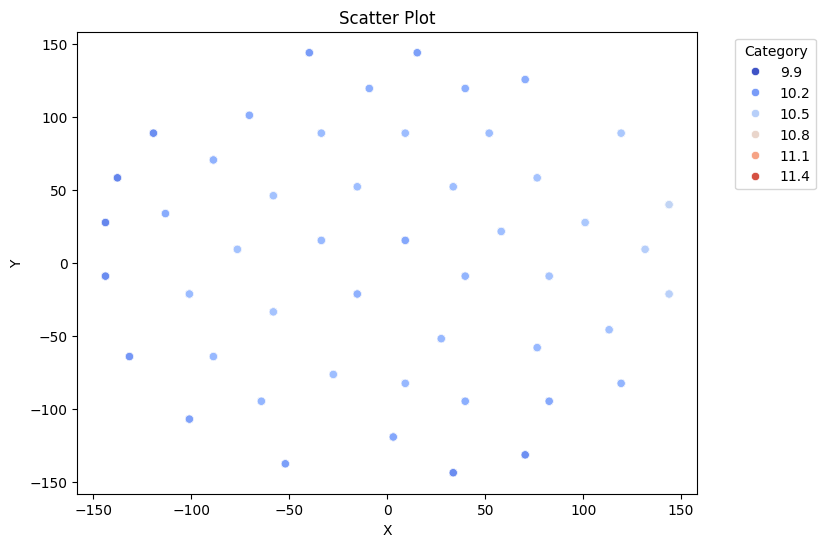

In [20]:
# # Create the contour plot
# ax2 = meas_df.plot.scatter(x='X',
#                            y='Y',
#                            c='Measurement',
#                            colormap='Accent')
# plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='X', y='Y', hue='Measurement', palette='coolwarm', data=meas_df)
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title(f"Scatter Plot")
plt.show()


In [13]:
# Create a 'run_duration' feature by calculating the difference between 'start_time_utc' and 'end_time_utc'
run_df['start_time_utc'] = pd.to_datetime(run_df['Run Start Time'])
run_df['end_time_utc'] = pd.to_datetime(run_df['Run End Time'])
run_df['run_duration'] = (run_df['end_time_utc'] - run_df['start_time_utc']).dt.total_seconds()

print(run_df.head())

                                Tool ID Run Start Time        Run End Time  \
0  8060e8e1-504a-5138-a9f0-e2770bd61ba1     2024-01-01 2024-01-01 00:12:35   
1  8060e8e1-504a-5138-a9f0-e2770bd61ba1     2024-01-01 2024-01-01 00:12:35   
2  8060e8e1-504a-5138-a9f0-e2770bd61ba1     2024-01-01 2024-01-01 00:12:35   
3  8060e8e1-504a-5138-a9f0-e2770bd61ba1     2024-01-01 2024-01-01 00:12:35   
4  8060e8e1-504a-5138-a9f0-e2770bd61ba1     2024-01-01 2024-01-01 00:12:35   

                                 Run ID                          Process Step  \
0  6515456b-05d4-5e6d-b42a-7652a8d671a4  22c8716b-1c14-525a-8c0a-0473ec7aa99e   
1  6515456b-05d4-5e6d-b42a-7652a8d671a4  22c8716b-1c14-525a-8c0a-0473ec7aa99e   
2  6515456b-05d4-5e6d-b42a-7652a8d671a4  22c8716b-1c14-525a-8c0a-0473ec7aa99e   
3  6515456b-05d4-5e6d-b42a-7652a8d671a4  22c8716b-1c14-525a-8c0a-0473ec7aa99e   
4  6515456b-05d4-5e6d-b42a-7652a8d671a4  22c8716b-1c14-525a-8c0a-0473ec7aa99e   

   Consumable Life Step ID                  

In [16]:
# 2. Feature engineering on run_df
# 2a. Aggregate each sensor’s time series per run into summary stats
agg_funcs = ["mean", "std", "min", "max"]
sensor_feats = (
    run_df
      .groupby(["Run ID", "Sensor Name"])["Sensor Value"]
      .agg(agg_funcs)
      .unstack(fill_value=0)
)
# flatten column MultiIndex
sensor_feats.columns = [
    f"{sensor}_{stat}" for sensor, stat in sensor_feats.columns
]
sensor_feats.reset_index(inplace=True)

In [17]:
#print(sensor_feats.head())

In [18]:
# 2b. Tool-life feature: max ConsumableLife per run
life_feat = (
    run_df
      .groupby("Run ID")["Consumable Life"]
      .max()
      .rename("ConsumableLifeMax")
      .reset_index()
)

# merge features
feat = sensor_feats.merge(life_feat, on="Run ID")

In [19]:
#print(feat.head())

In [20]:
# 2. Feature engineering on run_df
# 2c. Aggregate each tool's time series per run into summary stats
agg_funcs = ["mean", "std", "min", "max"]
tool_feats = (
    run_df
      .groupby(["Run ID", "Tool ID"])["Sensor Value"]
      .agg(agg_funcs)
      .unstack(fill_value=0)
)
# flatten column MultiIndex
tool_feats.columns = [
    f"{tool}_tool_{stat}" for tool, stat in tool_feats.columns
]

tool_feats.reset_index(inplace=True)
feat = feat.merge(tool_feats, on="Run ID")

In [21]:
#print(feat.head())

In [22]:
# 2. Feature engineering on run_df
# 2d. Aggregate each process's series per run into summary stats
agg_funcs = ["mean", "std", "min", "max"]
proc_feats = (
    run_df
      .groupby(["Run ID", "Process Step"])["Sensor Value"]
      .agg(agg_funcs)
      .unstack(fill_value=0)
)
# flatten column MultiIndex
proc_feats.columns = [
    f"{proc}_proc_{stat}" for proc, stat in proc_feats.columns
]

proc_feats.reset_index(inplace=True)
feat = feat.merge(proc_feats, on="Run ID")

In [23]:
#print(feat.head())

In [24]:
# 2. Feature engineering on run_df
# 2e. Aggregate each step’s time series per run into summary stats
agg_funcs = ["mean", "std", "min", "max"]
step_feats = (
    run_df
      .groupby(["Run ID", "Step ID"])["Sensor Value"]
      .agg(agg_funcs)
      .unstack(fill_value=0)
)
# flatten column MultiIndex
step_feats.columns = [
    f"{step}_{stat}" for step, stat in step_feats.columns
]

step_feats.reset_index(inplace=True)
feat = feat.merge(step_feats, on="Run ID")

In [25]:
#print(feat.head())

In [26]:
#Add incoming run sensor values
agg_funcs = ["mean", "std", "min", "max"]
incoming_feats = (
    incom_run_df
      .groupby(["Run ID", "Sensor Name"])["Sensor Value"]
      .agg(agg_funcs)
      .unstack(fill_value=0)
)
# flatten column MultiIndex
incoming_feats.columns = [
    f"{sensor}_incoming_{stat}" for sensor, stat in incoming_feats.columns
]
incoming_feats.reset_index(inplace=True)
feat = feat.merge(incoming_feats, on="Run ID")

In [27]:
#print(feat.head())

In [28]:
# Add the engineered run_duration feature
feat = feat.merge(run_df[['Run ID', 'run_duration']].drop_duplicates(), on='Run ID', how='left')

print("\nFeatures dataframe after engineering:")
print(feat.head())
print(feat.columns.tolist())


Features dataframe after engineering:
                                 Run ID  mean_Sensor_A  mean_Sensor_B  \
0  000f424f-667d-54a2-bbbd-9624c4071465       0.001230    1202.302368   
1  001466b9-ee4c-5642-8e93-0a501ce4e9d9       0.000596    -133.897141   
2  002d6c65-b86f-5153-a2d8-206e59da6307       0.001283   -1056.088379   
3  002fdc18-a36b-5188-a5e3-9e1d59697a6b      -0.002384     -23.619997   
4  004379ac-3743-5811-bb3b-d1821813b2d2      -0.000876     133.647980   

   mean_Sensor_C  mean_Sensor_D  mean_Sensor_E  mean_Sensor_F  mean_Sensor_G  \
0     104.422707    5820.641602       8.797877     120.705505      61.893738   
1     114.544716    6893.712402      10.528492     128.731644      54.082806   
2      92.291214    6344.273438       8.530919     123.559006      65.221832   
3      95.550697    6334.035645       7.551556     124.874435      63.301517   
4     111.237801    6592.873047       7.699797     125.464149      53.037315   

   mean_Sensor_H  mean_Sensor_I  ...  max

In [29]:
# 3. Combine with measurement targets
df = meas_df.merge(feat, on="Run ID", how="left")

# drop any runs with missing features (if any)
df.dropna(inplace=True)

In [30]:
print(df.head())

                                 Run ID      Run Start Time  \
0  00862337-2cc0-5b34-b5e1-45588e935c39 2024-01-02 04:45:25   
1  00862337-2cc0-5b34-b5e1-45588e935c39 2024-01-02 04:45:25   
2  00862337-2cc0-5b34-b5e1-45588e935c39 2024-01-02 04:45:25   
3  00862337-2cc0-5b34-b5e1-45588e935c39 2024-01-02 04:45:25   
4  00862337-2cc0-5b34-b5e1-45588e935c39 2024-01-02 04:45:25   

         Run End Time  X_index  Y_index           X          Y  Point Index  \
0 2024-01-02 04:58:00        1       23 -143.877551  -9.183673            3   
1 2024-01-02 04:58:00        1       29 -143.877551  27.551020           48   
2 2024-01-02 04:58:00        2       34 -137.755102  58.163265           43   
3 2024-01-02 04:58:00        3       14 -131.632653 -64.285714           20   
4 2024-01-02 04:58:00        5       39 -119.387755  88.775510            8   

   Measurement  mean_Sensor_A  ...  max_incoming_Sensor_39  \
0    10.006534       0.001297  ...              207.349152   
1    10.002181       0

In [31]:
print(df.dtypes)

Run ID                           object
Run Start Time           datetime64[ns]
Run End Time             datetime64[ns]
X_index                           int32
Y_index                           int32
                              ...      
max_incoming_Sensor_6           float32
max_incoming_Sensor_7           float32
max_incoming_Sensor_8           float32
max_incoming_Sensor_9           float32
run_duration                    float64
Length: 367, dtype: object


In [32]:
# # Create a categorical feature from 'run_type'
# df['Tool_ID_encoded'] = df['Tool ID'].astype('category').cat.codes
# df['Process_Step_encoded'] = df['Process Step'].astype('category').cat.codes
# df['Step_ID_encoded'] = df['Step ID'].astype('category').cat.codes

In [33]:
# df = df.drop(columns=['Tool ID', 'Process Step', 'Step ID'])
# print(df.dtypes)

In [34]:
corr_matrix = df.corr(numeric_only=True)["Measurement"].sort_values(ascending=False)
print(corr_matrix)

Measurement          1.000000
mean_Sensor_N        0.755044
std_Sensor_N         0.752535
min_Sensor_N         0.749013
max_Sensor_N         0.741277
                       ...   
ConsumableLifeMax   -0.067809
std_Sensor_E        -0.200163
mean_Sensor_E       -0.201605
max_Sensor_E        -0.206962
run_duration              NaN
Name: Measurement, Length: 364, dtype: float64


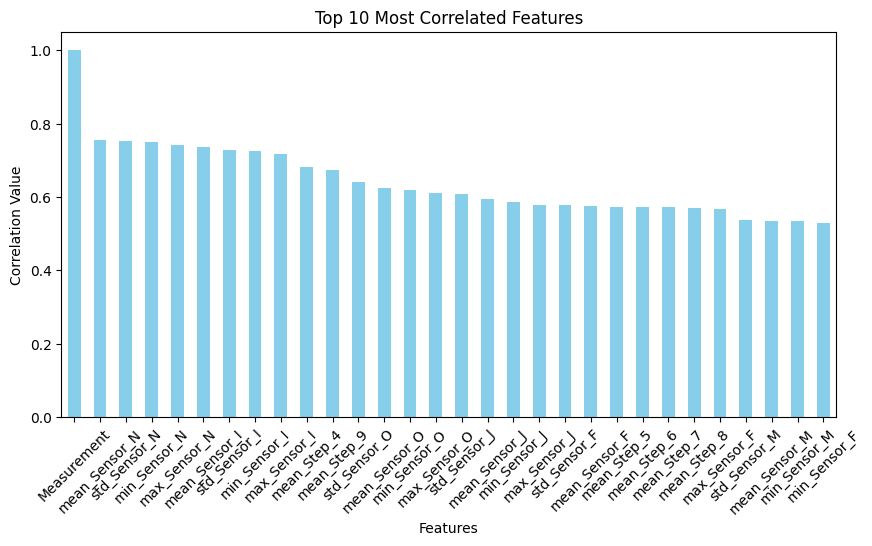

In [35]:
# Select top 30 most correlated features (excluding "Measurement" if needed)
top_10 = corr_matrix.nlargest(30)

# Plot bar chart
plt.figure(figsize=(10, 5))
top_10.plot(kind="bar", color="skyblue")
plt.xlabel("Features")
plt.ylabel("Correlation Value")
plt.title("Top 10 Most Correlated Features")
plt.xticks(rotation=45)
plt.show()

In [36]:
# 4. Train/validation split
X = df.drop(columns=["Run ID", "Measurement"])
y = df["Measurement"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [37]:
# Check for datetime columns
datetime_cols = X_train.select_dtypes(include=["datetime64"]).columns
print("Datetime columns:", list(datetime_cols))

Datetime columns: ['Run Start Time', 'Run End Time']


In [38]:
# Drop datetime columns from both train and val
X_train = X_train.drop(columns=datetime_cols)
X_test = X_test.drop(columns=datetime_cols)
X = X.drop(columns=datetime_cols)

In [39]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_val = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {
    "objective": "regression",
    "metric": "rmse",
    "verbosity": -1,
    "boosting_type": "gbdt",
    "learning_rate": 0.05,
    "num_leaves": 31,
    "feature_fraction": 0.9,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
}

lgb_model = lgb.train(
    params,
    lgb_train,
    valid_sets=[lgb_train, lgb_val],
    num_boost_round=1000,
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(period=100)
    ]
)

Training until validation scores don't improve for 50 rounds
[100]	training's rmse: 0.0366454	valid_1's rmse: 0.037109
[200]	training's rmse: 0.0279845	valid_1's rmse: 0.028624
[300]	training's rmse: 0.0245981	valid_1's rmse: 0.0253316
[400]	training's rmse: 0.0227617	valid_1's rmse: 0.0236058
[500]	training's rmse: 0.0214556	valid_1's rmse: 0.0224018
[600]	training's rmse: 0.0202746	valid_1's rmse: 0.0213143
[700]	training's rmse: 0.0193195	valid_1's rmse: 0.0204539
[800]	training's rmse: 0.0185811	valid_1's rmse: 0.0198104
[900]	training's rmse: 0.0177826	valid_1's rmse: 0.0190954
[1000]	training's rmse: 0.0170377	valid_1's rmse: 0.018417
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0170377	valid_1's rmse: 0.018417


In [40]:
# # 5. Hyperparameter tuning with LightGBM
# lgbm = lgb.LGBMRegressor(random_state=42)
# param_grid = {
#     "num_leaves":    [31, 63],
#     "learning_rate": [0.1, 0.01],
#     "n_estimators":  [100, 300]
# }
# grid = GridSearchCV(
#     estimator=lgbm,
#     param_grid=param_grid,
#     scoring="neg_root_mean_squared_error",
#     cv=3,
#     verbose=1,
#     n_jobs=-1
# )

In [41]:
# grid.fit(X_train, y_train)

# print("Best params:", grid.best_params_)

In [42]:
# 6. Evaluate on validation set
y_pred = lgb_model.predict(X_test)

val_rmse = root_mean_squared_error(y_test, y_pred)
print(f"Validation RMSE: {val_rmse:.4f}")

Validation RMSE: 0.0184


In [43]:
pred_val_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_val_df.head()

,Actual,Predicted
73554,10.078344,10.090828
140000,10.262311,10.251587
78039,10.278650,10.286377
68565,10.516511,10.514361
4904,10.272160,10.240192


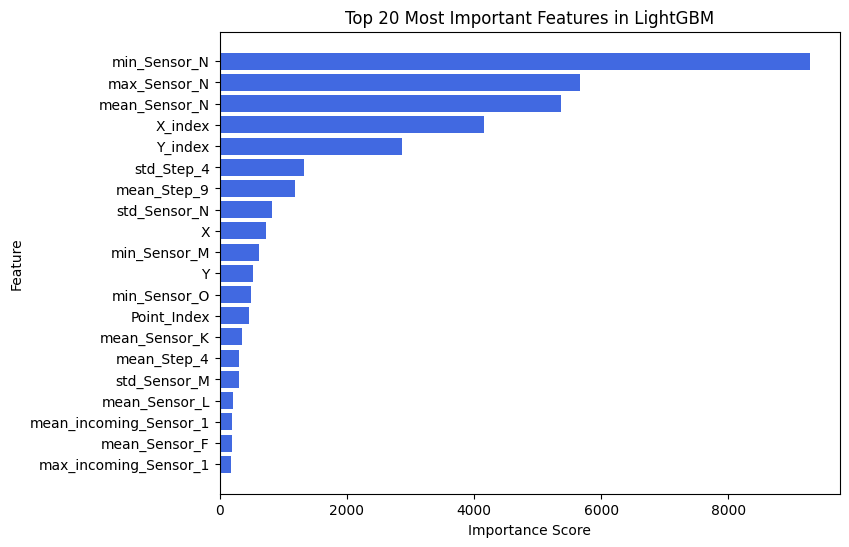

In [45]:
# Get feature importance scores
feature_importance = lgb_model.feature_importance(importance_type='gain')  # Or use 'split'
feature_names = lgb_model.feature_name()

# Create DataFrame for sorting
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort and select top 10
top_features = importance_df.sort_values(by='Importance', ascending=False).head(20)

plt.figure(figsize=(8, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='royalblue')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Top 20 Most Important Features in LightGBM")
plt.gca().invert_yaxis()  # Ensures highest importance is at the top
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [47]:
reg = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)


In [48]:
# Evaluate performance
rmse = root_mean_squared_error(y_test, y_pred)
print(f"Regression RMSE: {rmse:.4f}")

Regression RMSE: 0.0752


In [49]:
pred_val_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_val_df.head()

,Actual,Predicted
73554,10.078344,10.063186
140000,10.262311,10.252315
78039,10.278650,10.464753
68565,10.516511,10.483517
4904,10.272160,10.248052


In [50]:
import xgboost as xgb

In [51]:
# Initialize XGBoost classifier
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, use_label_encoder=False)

# Train model
xgb_model.fit(X_train, y_train)


c:\Users\felic\miniconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:58:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [52]:
# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate performance
rmse = root_mean_squared_error(y_test, y_pred)
print(f"Regression RMSE: {rmse:.4f}")

Regression RMSE: 0.0464


In [53]:
pred_val_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_val_df.head()

,Actual,Predicted
73554,10.078344,10.090153
140000,10.262311,10.263160
78039,10.278650,10.312742
68565,10.516511,10.464619
4904,10.272160,10.234859


In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [56]:
# Predict on test set
y_pred = lr_model.predict(X_test)

# Evaluate performance
rmse = root_mean_squared_error(y_test, y_pred)
print(f"Regression RMSE: {rmse:.4f}")

Regression RMSE: 0.0809


In [57]:
pred_val_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_val_df.head()

,Actual,Predicted
73554,10.078344,10.101333
140000,10.262311,10.178174
78039,10.278650,10.353642
68565,10.516511,10.399328
4904,10.272160,10.367350


In [58]:
import catboost
from catboost import CatBoostRegressor

In [59]:
# Initialize CatBoost model
cat_model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, verbose=0)

# Train the model
cat_model.fit(X_train, y_train)

In [60]:
# Predict
y_pred = cat_model.predict(X_test)

# Evaluate with RMSE
rmse_cat = root_mean_squared_error(y_test, y_pred)
print(f"CatBoost Regression RMSE: {rmse_cat:.4f}")

CatBoost Regression RMSE: 0.0379


In [61]:
pred_val_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_val_df.head()

,Actual,Predicted
73554,10.078344,10.089168
140000,10.262311,10.246979
78039,10.278650,10.316564
68565,10.516511,10.467740
4904,10.272160,10.225871


In [ ]:
# 7. Retrain on full dataset and prepare test submission
# (Assumes you have test_run_df & test_meas_df)
# test_sensor = (
#     test_run_df
#       .groupby(["RunId","SensorName"])["SensorValue"]
#       .agg(agg_funcs)
#       .unstack(fill_value=0)
# )
# test_sensor.columns = [f"{s}_{st}" for s, st in test_sensor.columns]
# test_sensor.reset_index(inplace=True)
# test_life = test_run_df.groupby("RunId")["ConsumableLife"].max().reset_index()
# test_feat = test_sensor.merge(test_life, on="RunId")
# test_df = test_meas_df.merge(test_feat, on="RunId", how="left")
#
# # retrain on all
# full_model = best_model.fit(X, y)
# test_pred   = full_model.predict(test_df.drop(columns=["RunId","X","Y"]))
#
# submission = test_df[["RunId","X","Y"]].copy()
# submission["Measurement"] = test_pred
# submission.to_csv("submission.csv", index=False)